In [ ]:
!pip install tensorflow keras matplotlib opencv-python-headless


In [ ]:
# Unzip the dataset
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content/dataset')

In [ ]:
file_path_string = "/content/dataset/" +\
"""├── test/""" +\
"\n" +\
"""│   ├── Closed_Eyes/""" + \
"\n" +\
"""│   └── Open_Eyes/""" +\
"\n" +\
"""└── train/""" +\
"\n" +\
"""    ├── Closed_Eyes/""" +\
"\n" +\
"""    └── Open_Eyes/"""

print(file_path_string)

/content/dataset/├── test/
│   ├── Closed_Eyes/
│   └── Open_Eyes/
└── train/
    ├── Closed_Eyes/
    └── Open_Eyes/


In [ ]:
# Verify if the directory exists
if os.path.exists('/content/dataset/dataset/train'):
    print("Training directory found.")
else:
    print("Training directory not found. Please check the extraction process.")
    # Add debugging or alternative solutions here if the directory is not found

Training directory found.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generators with augmentation for training and without for validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow from directory for training and testing
train_generator = train_datagen.flow_from_directory(
    '/content/dataset/dataset/train',
    target_size=(24, 24),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/dataset/dataset/test',
    target_size=(24, 24),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)


Found 3400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(24, 24, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 64)          0

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20
107/107 [==============================] - 8s 57ms/step - loss: 0.5275 - accuracy: 0.7071 - val_loss: 0.0657 - val_accuracy: 1.0000
Epoch 2/20
107/107 [==============================] - 7s 67ms/step - loss: 0.2871 - accuracy: 0.8762 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 3/20
107/107 [==============================] - 6s 52ms/step - loss: 0.1783 - accuracy: 0.9282 - val_loss: 0.0058 - val_accuracy: 0.9983
Epoch 4/20
107/107 [==============================] - 7s 67ms/step - loss: 0.1151 - accuracy: 0.9553 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/20
107/107 [==============================] - 6s 51ms/step - loss: 0.0865 - accuracy: 0.9674 - val_loss: 0.0039 - val_accuracy: 0.9967
Epoch 6/20
107/107 [==============================] - 6s 53ms/step - loss: 0.0743 - accuracy: 0.9715 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/20
107/107 [==============================] - 8s 76ms/step - loss: 0.0615 - accuracy: 0.9803 - val_loss: 2.1311e-04 - val_accuracy: 1.

In [ ]:
# Evaluate the model on the validation data
test_loss, test_accuracy = model.evaluate(validation_generator, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


19/19 - 1s - loss: 2.1209e-06 - accuracy: 1.0000 - 880ms/epoch - 46ms/step
Test Accuracy: 1.0000


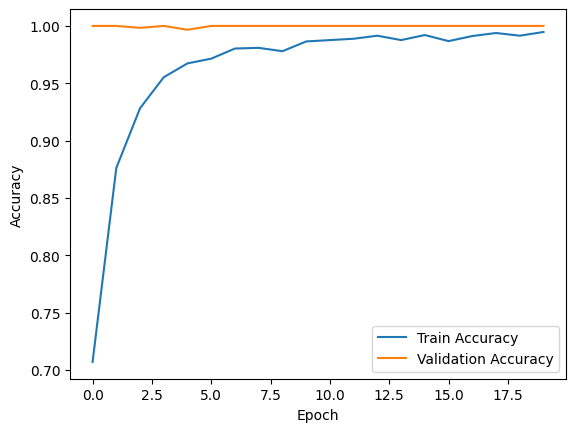

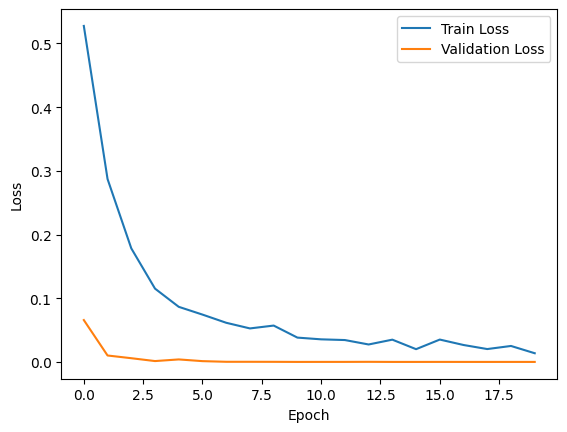

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
model.save('eye_state_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('eye_state_cnn_model.h5')


Saving IMG_20231102_182312.jpg to IMG_20231102_182312.jpg
1/1 [==============================] - 0s 140ms/step


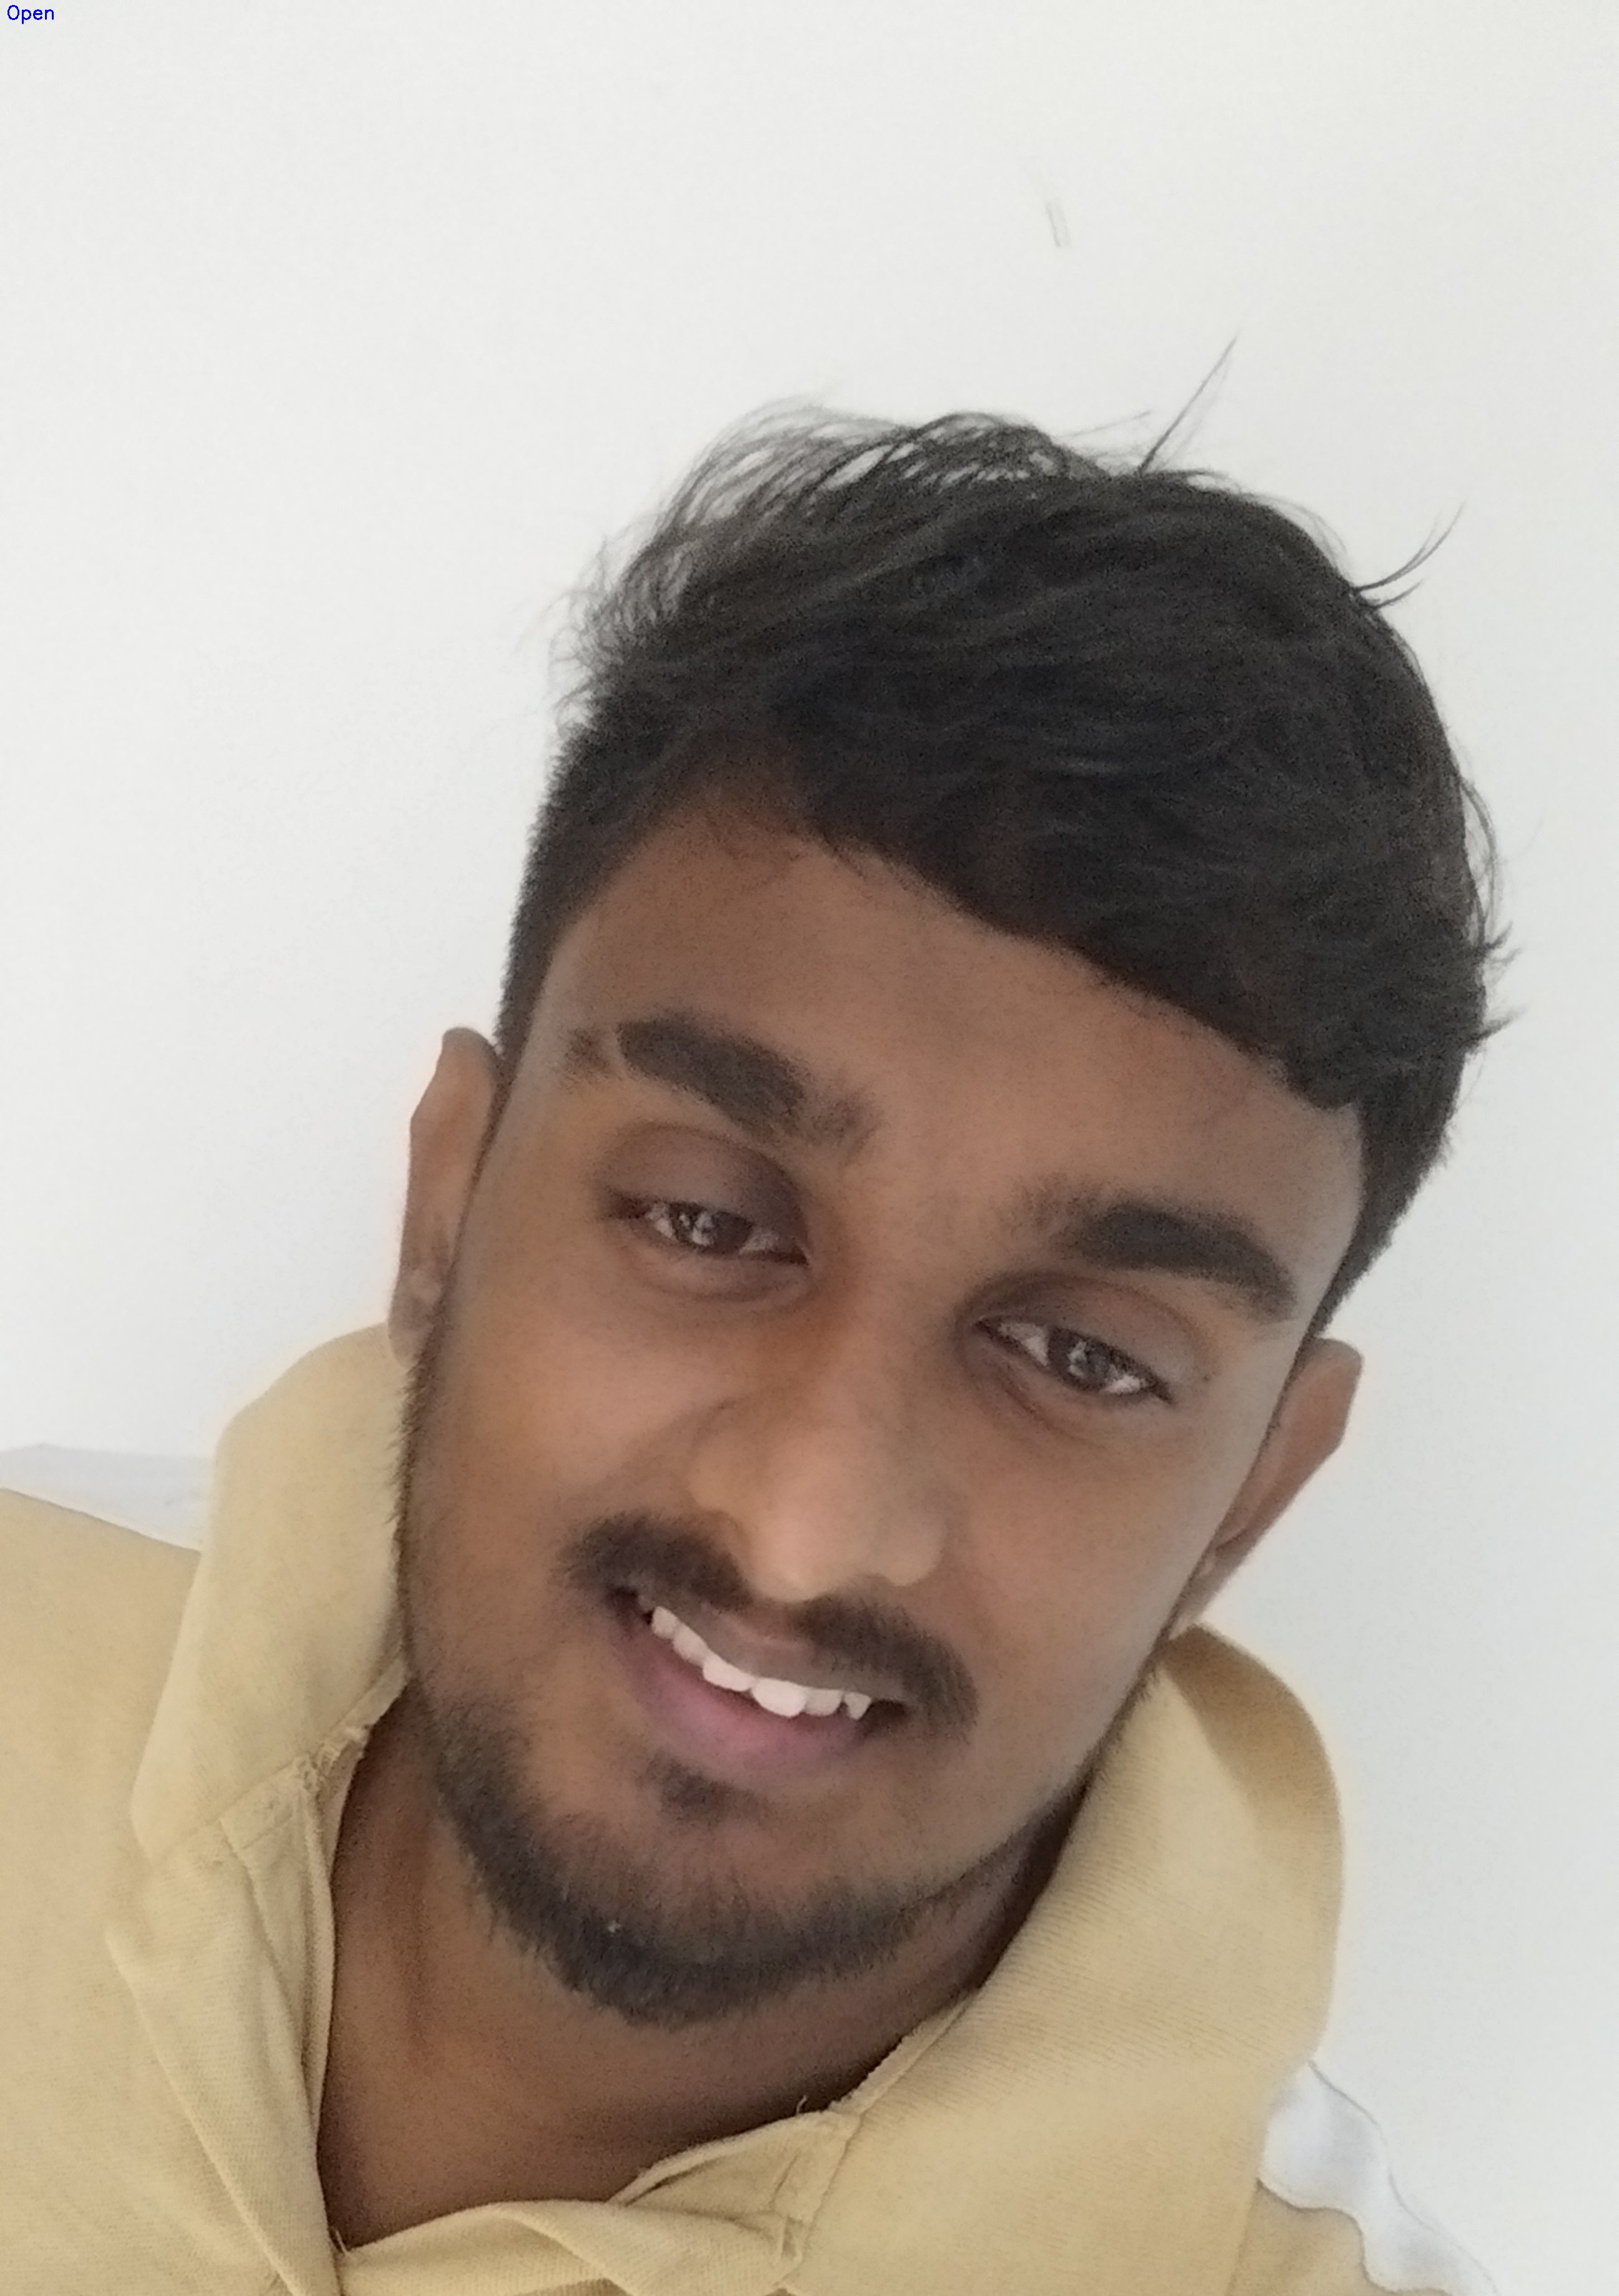

In [ ]:
import cv2
import numpy as np

def classify_eye(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(image, (24, 24)).reshape(1, 24, 24, 1) / 255.0
    prediction = model.predict(resized)
    state = 'Open' if np.argmax(prediction) == 1 else 'Closed'
    return state

# Example usage
from google.colab.patches import cv2_imshow
uploaded = files.upload()

for filename in uploaded.keys():
    state = classify_eye(filename)
    image = cv2.imread(filename)
    cv2.putText(image, state, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2_imshow(image)

Saving 62776399-woman-closed-eye-close-up-isolated-on-white.jpg to 62776399-woman-closed-eye-close-up-isolated-on-white.jpg
1/1 [==============================] - 0s 34ms/step


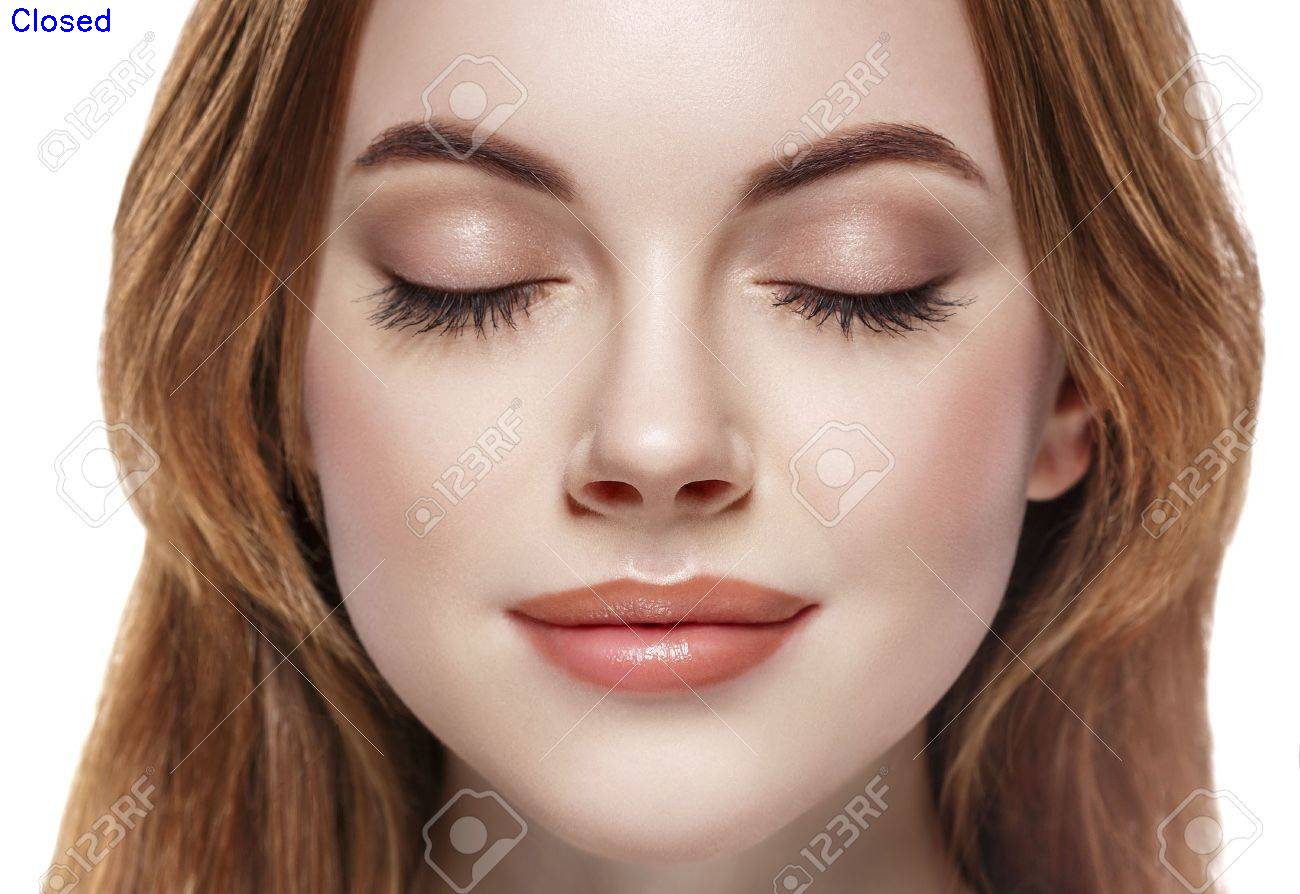

In [ ]:
import cv2
import numpy as np

def classify_eye(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(image, (24, 24)).reshape(1, 24, 24, 1) / 255.0
    prediction = model.predict(resized)
    state = 'Open' if np.argmax(prediction) == 1 else 'Closed'
    return state

# Example usage
from google.colab.patches import cv2_imshow
uploaded = files.upload()

for filename in uploaded.keys():
    state = classify_eye(filename)
    image = cv2.imread(filename)
    cv2.putText(image, state, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2_imshow(image)


Saving istockphoto-1282996112-612x612.jpg to istockphoto-1282996112-612x612 (2).jpg
Saving pexels-photo-2379005.jpeg to pexels-photo-2379005 (2).jpeg
Saving 360_F_453659697_DRdT8DmAHZv44tUbqGrgclam9BdsOPjj.jpg to 360_F_453659697_DRdT8DmAHZv44tUbqGrgclam9BdsOPjj (3).jpg
1/1 [==============================] - 0s 21ms/step


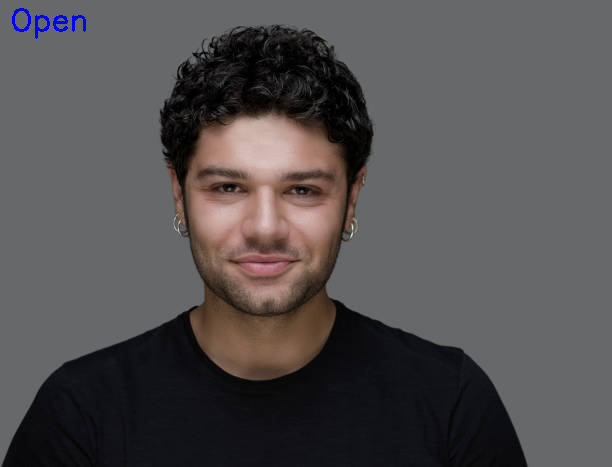

1/1 [==============================] - 0s 21ms/step


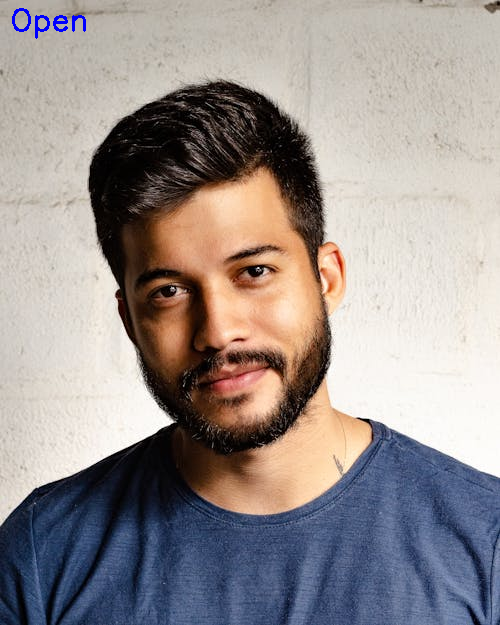

1/1 [==============================] - 0s 33ms/step


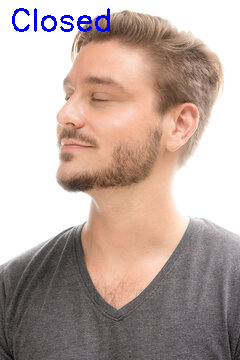

In [ ]:
import cv2
import numpy as np

def classify_eye(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(image, (24, 24)).reshape(1, 24, 24, 1) / 255.0
    prediction = model.predict(resized)
    state = 'Open' if np.argmax(prediction) == 1 else 'Closed'
    return state

# Example usage
from google.colab.patches import cv2_imshow
uploaded = files.upload()

for filename in uploaded.keys():
    state = classify_eye(filename)
    image = cv2.imread(filename)
    cv2.putText(image, state, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2_imshow(image)

Saving Outdoors-man-portrait_(cropped).jpg to Outdoors-man-portrait_(cropped) (1).jpg
1/1 [==============================] - 0s 34ms/step


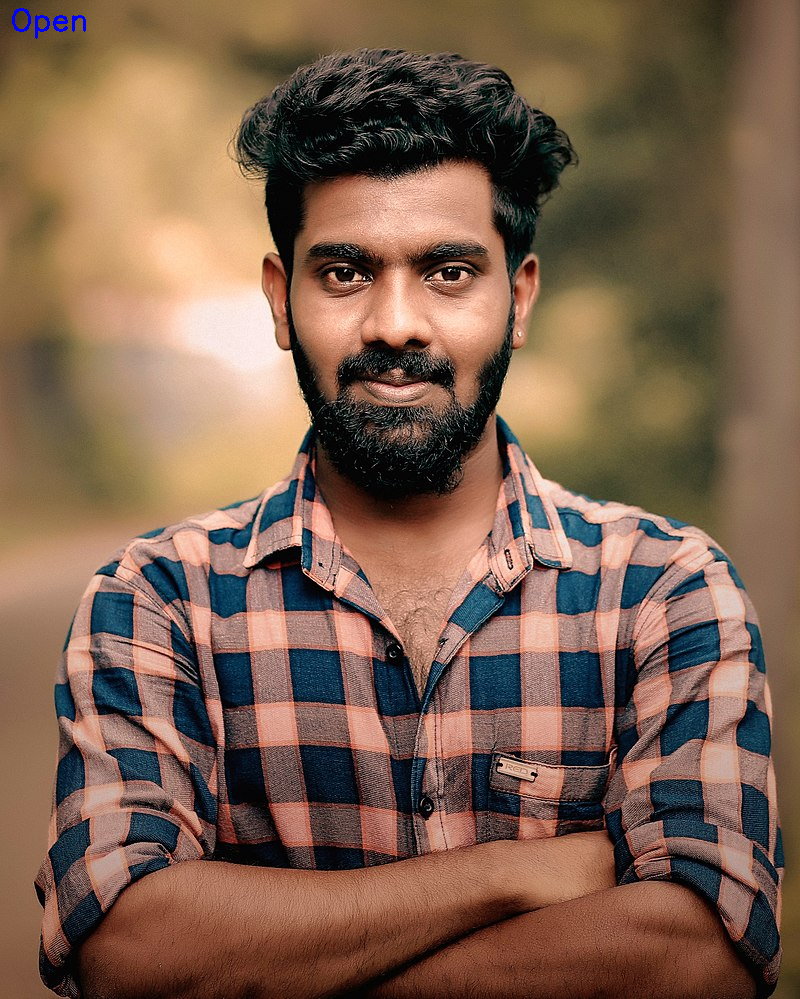

In [ ]:
import cv2
import numpy as np

def classify_eye(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(image, (24, 24)).reshape(1, 24, 24, 1) / 255.0
    prediction = model.predict(resized)
    state = 'Open' if np.argmax(prediction) == 1 else 'Closed'
    return state

# Example usage
from google.colab.patches import cv2_imshow
uploaded = files.upload()

for filename in uploaded.keys():
    state = classify_eye(filename)
    image = cv2.imread(filename)
    cv2.putText(image, state, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2_imshow(image)

In [ ]:
import cv2
import numpy as np

def classify_eye(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(image, (24, 24)).reshape(1, 24, 24, 1) / 255.0
    prediction = model.predict(resized)
    state = 'Open' if np.argmax(prediction) == 1 else 'Closed'
    return state

# Example usage
from google.colab.patches import cv2_imshow
uploaded = files.upload()

for filename in uploaded.keys():
    state = classify_eye(filename)
    image = cv2.imread(filename)
    cv2.putText(image, state, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2_imshow(image)